# Аналитика в Яндекс.Афише

Задание: помочь маркетологам оптимизировать маркетинговые затраты.
В распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

# План проекта:

**Шаг 1. Загрузить данные и подготовить их к анализу**

Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. 
Путь к файлам:
- /datasets/visits_log.csv. 
- /datasets/orders_log.csv. 
- /datasets/costs.csv. 

**Шаг 2. Построить отчёты и посчитать метрики**

Продукт
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

Продажи
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

**Шаг 3. Написать вывод:** 
- Порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?
- Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? 
- Какие выводы вы сделали, узнав значение метрик?

# Описание данных

**Таблица visits (лог сервера с информацией о посещениях сайта):**
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь

**Таблица orders (информация о заказах):**
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа

**Таблица costs (информация о затратах на маркетинг):**
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

## Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd             
import matplotlib.pyplot as plt  
import numpy as np               
import seaborn as sns            
from scipy import stats as st    

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [4]:
print('Информация по таблице visits')
print()
visits.info()
print()
visits.describe() 

Информация по таблице visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB



,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [5]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [6]:
print('Информация по таблице orders')
print()
orders.info()
print()
orders.describe() 

Информация по таблице orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB



,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [7]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [8]:
print('Информация по таблице costs')
print()
costs.info()
print()
costs.describe() 

Информация по таблице costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB



,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [9]:
visits.rename(columns={'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Start Ts': 'start_ts', 'Uid': 'uid'}, inplace=True)
orders.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'}, inplace=True)

In [10]:
check_visits = visits.query('start_ts > end_ts')

In [11]:
check_visits.count()

device       2
end_ts       2
source_id    2
start_ts     2
uid          2
dtype: int64

In [12]:
check_orders = orders.query('revenue <= 0')

In [13]:
print(check_orders.count())

buy_ts     51
revenue    51
uid        51
dtype: int64


In [14]:
#Привожу столбцы к нужным типам данных: 
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

orders['revenue'] = orders['revenue'].astype('int')

In [15]:
print(visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum())

0 0 0


### Вывод по шагу 1

Изучил таблицы, пропусков нет, дупликатов нет.
Оптимизировал таблицы для анализа, переименовал столбцы, привёл даты к типу datetime и выручку с затратами к типу int.

## Построить отчёты и посчитать метрики

### Продукт

#### Сколько людей пользуются в день, неделю, месяц?

In [16]:
#создаю нужные для анализа столбцы и привожу данные к нужным типам:
visits['date'] = visits['start_ts'].astype('datetime64')
visits['day_number'] = visits['start_ts'].astype('datetime64[D]')
visits['month'] = visits['start_ts'].astype('datetime64[M]')
visits['year'] = visits['start_ts'].astype('datetime64[Y]')
visits['week_number'] = visits['start_ts'].astype('datetime64[W]')
visits['day_of_week'] = visits['start_ts'].dt.day_name()
visits['month_name'] = visits['start_ts'].dt.month_name()

In [17]:
visits.head(5)

,device,end_ts,source_id,start_ts,uid,date,day_number,month,year,week_number,day_of_week,month_name
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20,2017-12-01,2017-01-01,2017-12-14,Wednesday,December
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19,2018-02-01,2018-01-01,2018-02-15,Monday,February
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-01-01,2017-06-29,Saturday,July
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20,2018-05-01,2018-01-01,2018-05-17,Sunday,May
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27,2017-12-01,2017-01-01,2017-12-21,Wednesday,December


In [18]:
#Для анализа метрик отдельно по разным девайсам, соберу новые таблицы: 
desktop = visits.query('device == "desktop"')
touch = visits.query('device == "touch"')

In [19]:
dau = visits.groupby(['device', 'day_number']).agg({'uid': 'nunique'}).reset_index()
dau = dau.pivot_table(index='day_number', columns='device', values='uid')

wau = visits.groupby(['device', 'year', 'week_number']).agg({'uid': 'nunique'})
wau = wau.pivot_table(index='week_number', columns='device', values='uid')

mau = visits.groupby(['device', 'year', 'month']).agg({'uid': 'nunique'})
mau = mau.pivot_table(index='month', columns='device', values='uid')

In [20]:
print('В день Desktop юзеров:', int(dau['desktop'].mean()))
print('В день Мобильных юзеров:', int(dau['touch'].mean()))

В день Desktop юзеров: 659
В день Мобильных юзеров: 252


In [21]:
print('В неделю Desktop юзеров:', int(wau['desktop'].mean()))
print('В неделю Мобильных юзеров:', int(wau['touch'].mean()))

В неделю Desktop юзеров: 4090
В неделю Мобильных юзеров: 1613


In [22]:
print('В месяц Desktop юзеров::', int(mau['desktop'].mean()))
print('В месяц Мобильных юзеров::', int(mau['touch'].mean()))

В месяц Desktop юзеров:: 16724
В месяц Мобильных юзеров:: 6825


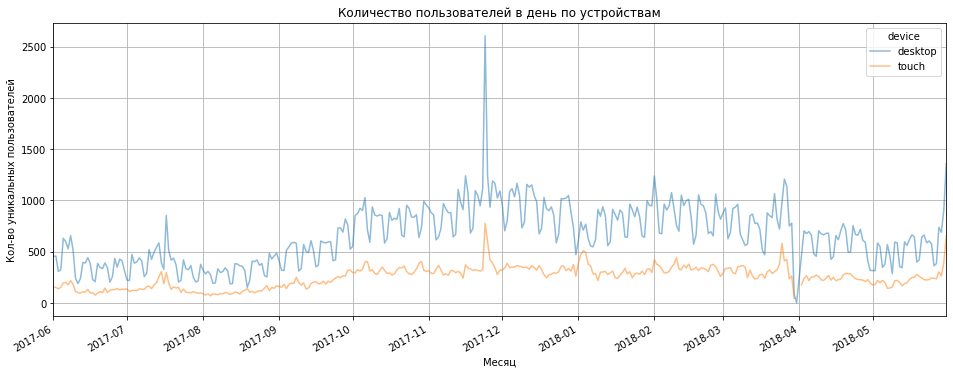

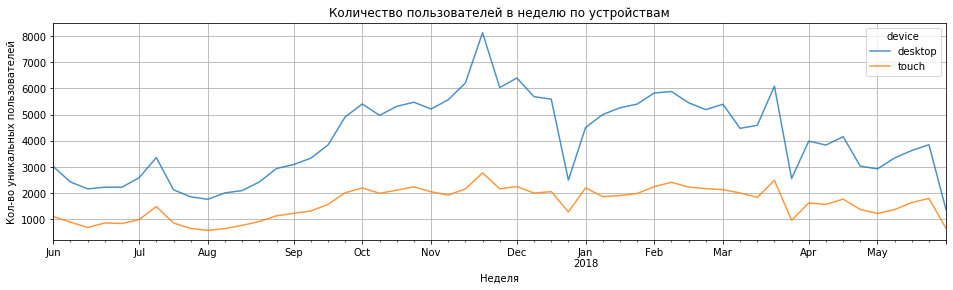

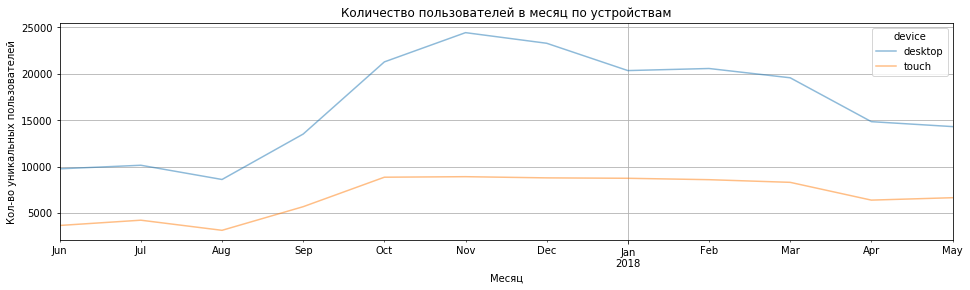

In [23]:
#строю графики числа пользователей в зависимости от платформы:
dau.plot(figsize=(16, 6), title='Количество пользователей в день по устройствам', grid=True, legend=True, alpha=0.5)
plt.xlabel('Месяц')
plt.ylabel('Кол-во уникальных пользователей')
plt.show()

wau.plot(figsize=(16, 4), title='Количество пользователей в неделю по устройствам', grid=True, legend=True, alpha=0.8)
plt.xlabel('Неделя')
plt.ylabel('Кол-во уникальных пользователей')
plt.show()

mau.plot(figsize=(16, 4), title='Количество пользователей в месяц по устройствам', grid=True, legend=True, alpha=0.5)
plt.xlabel('Месяц')
plt.ylabel('Кол-во уникальных пользователей')
plt.show()

#### Сколько в среднем сессий в день?

In [24]:
session_count = desktop.groupby('date').agg({'uid': 'count'}).mean().astype(int)
print("Среднее количество сессий у desktop в день {0:.2f} ".format(session_count[0]))

session_count = touch.groupby('date').agg({'uid': 'count'}).mean().astype(int)
print("Среднее количество сессий у touch в день {0:.2f} ".format(session_count[0]))

session_count = visits.groupby('date').agg({'uid': 'count'}).mean().astype(int)
print("Среднее количество сессий по всем пользователям в день {0:.2f} ".format(session_count[0]))

Среднее количество сессий у desktop в день 1.00 
Среднее количество сессий у touch в день 1.00 
Среднее количество сессий по всем пользователям в день 1.00 


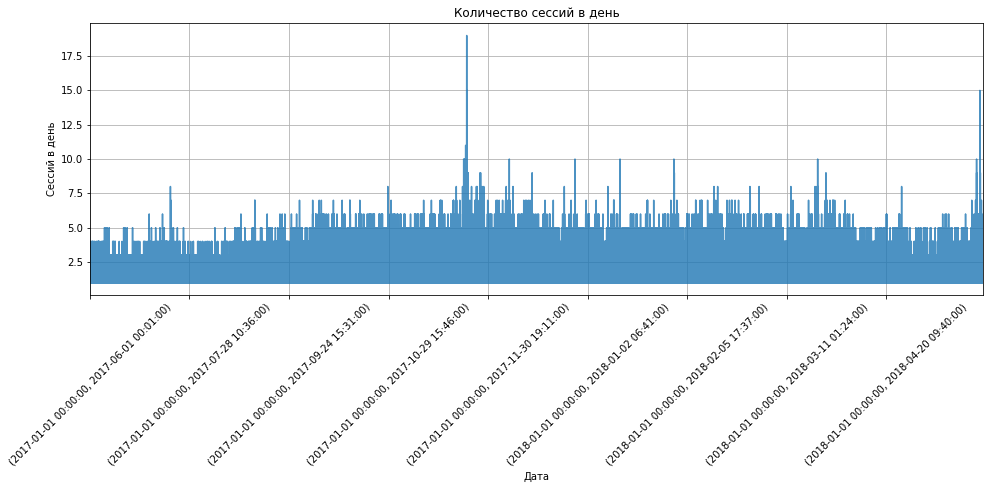

Среднее количество сессий для одного пользователя в день: 1.00


In [25]:
session_count = visits.groupby(['year', 'date']).agg({'uid': ['count','nunique']})
session_count.columns = ['n_sessions', 'n_users']
session_count['sessions_per_user'] = session_count['n_sessions'] / session_count['n_users']

session_count.plot(figsize=(16, 5), title='Количество сессий в день', grid=True, legend=False, y='n_sessions',  alpha=0.8)
plt.xticks(rotation= 45)
plt.xlabel('Дата')
plt.ylabel('Сессий в день')
plt.show()

print('Среднее количество сессий для одного пользователя в день:','{:.2f}'.format(session_count['sessions_per_user'].median()))

#### Сколько длится одна сессия?

In [26]:
#ищу среднее время сессий: 
visits = visits.copy()
desktop = desktop.copy()
touch = touch.copy()

visits['session_duration_minunes'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60
desktop['session_duration_minunes'] = (desktop['end_ts'] - desktop['start_ts']).dt.total_seconds() / 60
touch['session_duration_minunes'] = (touch['end_ts'] - touch['start_ts']).dt.total_seconds() / 60

print('Среднее время сессии по всем пользователям: ', visits['session_duration_minunes'].median(), 'минут')
print('Среднее время сессии по desktop пользователям: ', desktop['session_duration_minunes'].median(), 'минут')
print('Среднее время сессии по touch пользователям: ', touch['session_duration_minunes'].median(), 'минут')

Среднее время сессии по всем пользователям:  5.0 минут
Среднее время сессии по desktop пользователям:  6.0 минут
Среднее время сессии по touch пользователям:  3.0 минут


In [27]:
#избавлюсь от нулевых сессий: 
visits = visits.query('session_duration_minunes > 0')

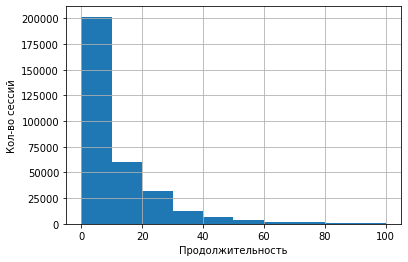

In [28]:
visits['session_duration_minunes'].hist(bins=10, range=(0, 100))
plt.xlabel('Продолжительность')
plt.ylabel('Кол-во сессий')
plt.show()

#### Как часто клиенты возвращаются? 

In [29]:
#для постороения когорт ищу начальную дату для каждого пользователя:
first_activity_date = visits.groupby(['uid'])['date'].min() 
first_activity_date.name = 'first_activity_date' 
visits = visits.join(first_activity_date, on='uid')
visits['first_activity_date'] = pd.to_datetime(visits['first_activity_date'])

In [30]:
first_activity_date

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446316582013423015   2018-02-26 10:14:00
18446403737806311543   2017-11-30 03:36:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_activity_date, Length: 207051, dtype: datetime64[ns]

In [31]:
visits['activity_month'] = visits['date'].astype('datetime64[M]')

visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

visits['lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['lifetime'] = visits['lifetime'] / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

cohorts = visits.groupby(['first_activity_month','lifetime']).agg({'uid':'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

cohorts = cohorts.merge(initial_users_count, on='first_activity_month')

cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='lifetime',values='retention',aggfunc='sum')
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")

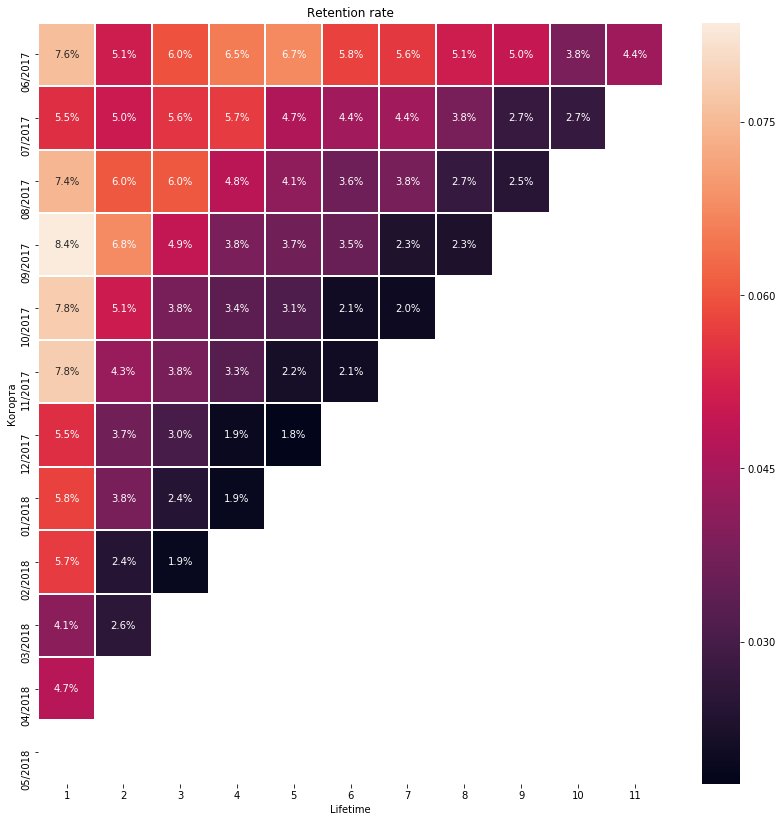

In [32]:
#строю тепловую карту:
retention_pivot_heatmap = retention_pivot 
del retention_pivot_heatmap[0] 
plt.figure(figsize=(14, 14))
sns.heatmap(retention_pivot_heatmap, annot=True, fmt='.1%', linewidths=1)
plt.title('Retention rate')
plt.ylabel('Когорта')
plt.xlabel('Lifetime')
plt.show()

In [33]:
#нахожу средний RR на 6й месяц жизни когорты
retention_pivot_heatmap[5].mean()

0.03757674948150591

### Вывод по продукту

В день продуктом пользуется в среднем 906 человек. В неделю -- 5822, а в месяц -- 23219. Средняя сессия длится 5 минут. 
В день каждый пользователь заходит в сервис в среднем 1 раз.

В мобильной версии пользователи проводят в среднем почти 3 минут за сессию, в то время как для десктоп версии этот показатель равен 6 минутам. Кажется, выбирать билеты все же приятнее на большом экране. Или браузерная версия наоборот - слишком неудобная и требует больше времени на поиск? 

Retention rate по кагортам показывает, что пользователи редко возвращаются на следующий месяц. Из месяца в месяц коэффициент удержания падает. 

Сервису нужно предпринимать шаги по повышению лояльности аудитории. 

### Продажи

#### Когда люди начинают покупать?

In [34]:
#Нахожу дату первой сессии и первой покупки каждого пользователя отдельно, чтобы посчитать
#на какой день после первой сессии была первая покупка
first_buy = visits.groupby('uid').agg({'start_ts':'min'}) 
first_unique_buy = orders.groupby('uid').agg({'buy_ts':'min'})  
first_unique_buy = first_unique_buy.merge(first_buy, on='uid')              

first_unique_buy['buy_after'] = first_unique_buy['buy_ts'] - first_unique_buy['start_ts']
first_unique_buy['buy_after'] = first_unique_buy['buy_after'].dt.round('1D')     
first_unique_buy['buy_after'] = first_unique_buy['buy_after'] / np.timedelta64(1,'D')

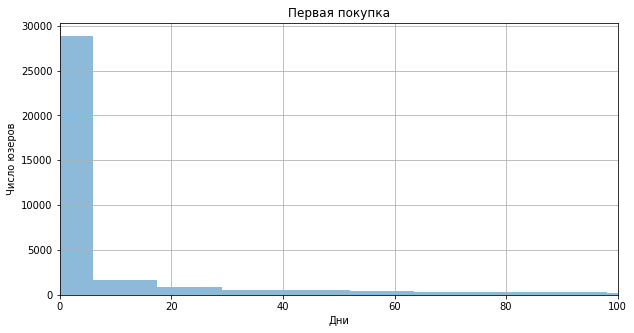

In [35]:
first_unique_buy.plot(y='buy_after', kind='hist', bins=60, xlim=(0, 100), figsize=(10, 5), grid=True, legend=False, alpha=0.5)
plt.title('Первая покупка')
plt.xlabel('Дни')
plt.ylabel('Число юзеров')
plt.show()

In [36]:
print('Среднее число дней после регистрации до первой покупки:', first_unique_buy['buy_after'].mode())

Среднее число дней после регистрации до первой покупки: 0    0.0
dtype: float64


In [37]:
print('Доля покупок в день регистрации:', len(first_unique_buy.query('buy_after < 1')['buy_after']) / len(first_unique_buy['buy_after']))

Доля покупок в день регистрации: 0.707436046672764


#### Сколько раз покупают за период?

В качестве периода приму месяц -- достаточно удобный для анализа интервал

In [38]:
#когорты мои когорты...
first_order_date = orders.groupby('uid')['buy_ts'].min() 
first_order_date.name = 'first_order_date'               
orders = orders.merge(first_order_date, on='uid')    

orders_in_period = orders
orders_in_period['order_month'] = orders_in_period['buy_ts'].astype('datetime64[M]')
orders_in_period['first_order_month'] = orders_in_period['first_order_date'].astype('datetime64[M]')

In [39]:
orders_in_period['lifetime'] = orders_in_period['order_month'] - orders_in_period['first_order_month']
orders_in_period['lifetime'] = orders_in_period['lifetime'] / np.timedelta64(1, 'M')
orders_in_period['lifetime'] = orders_in_period['lifetime'].round().astype('int')

In [40]:
first_source_id = visits.sort_values('start_ts').groupby('uid').agg({'source_id':'first'}).reset_index()
first_source_id.columns = ['uid', 'first_source_id']
orders_in_period = orders_in_period.merge(first_source_id, on='uid')

In [41]:
orders_in_period = orders_in_period.groupby(['lifetime', 'first_order_month']).agg({'buy_ts':'count','uid':'nunique'})
orders_in_period['rate'] = orders_in_period['buy_ts'] / orders_in_period['uid']

In [42]:
orders_pivot = orders_in_period.pivot_table(index='first_order_month',columns='lifetime',values='rate',aggfunc='mean').head(12)

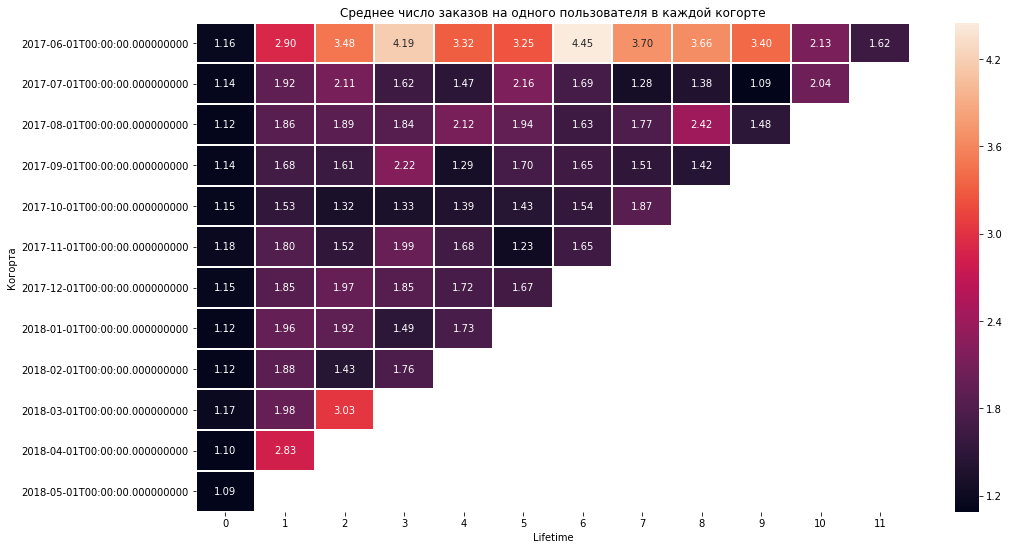

In [43]:
plt.figure(figsize=(16, 9))
plt.title('Среднее число заказов на одного пользователя в каждой когорте')
sns.heatmap(orders_pivot, annot=True, fmt='.2f', linewidths=1)
plt.ylabel('Когорта')
plt.xlabel('Lifetime')
plt.show()

In [44]:
#Среднемесячное число заказов клиента с Лайфтайм = 6 месяцев
orders_pivot[5].mean()

1.9112342812877967

In [45]:
orders_pivot
print('Среднее число заказов на 1 юзера в месяц по когортам:')
print(orders_pivot.mean())

Среднее число заказов на 1 юзера в месяц по когортам:
lifetime
0     1.136684
1     2.017888
2     2.027191
3     2.031604
4     1.840766
5     1.911234
6     2.101070
7     2.027218
8     2.218946
9     1.991593
10    2.085897
11    1.622642
dtype: float64


#### Какой средний чек? 

In [46]:
mean_check = orders.pivot_table(index='order_month', values=['revenue', 'buy_ts'], aggfunc=['sum', 'count']).reset_index()
mean_check.columns = ['order_month', 'revenue', 'buy_cnt', 'mean_revenue']
mean_check['mean_revenue'] = mean_check['revenue'] / mean_check['buy_cnt']

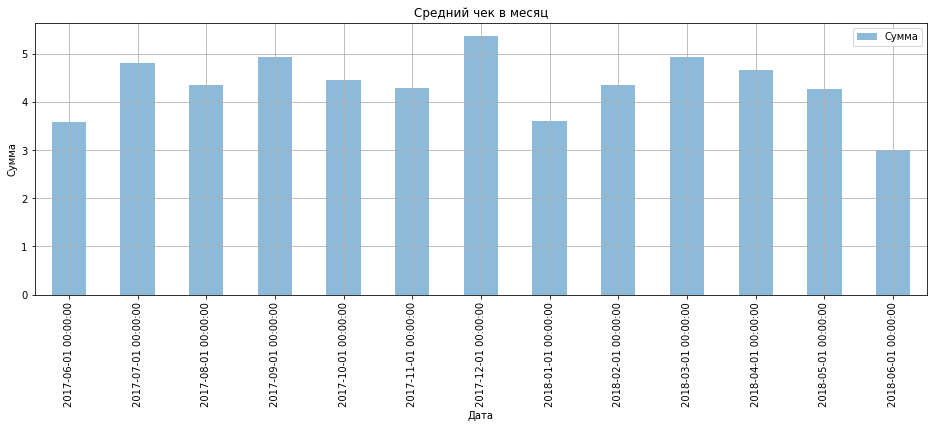

In [47]:
mean_check.plot(x='order_month', y='mean_revenue', kind='bar', figsize=(16, 5), grid=True, alpha=0.5, label='Сумма')
plt.title('Средний чек в месяц')
plt.ylabel('Сумма')
plt.xlabel('Дата')
plt.show()

In [48]:
print('Среднее "средний чек" по всем юзерам:', mean_check['mean_revenue'].mean())

Среднее "средний чек" по всем юзерам: 4.355545792691138


Посмотрю, пользователи каких утройств тратят больше:

In [49]:
first_device = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'device': 'first'})
first_device = first_device.rename(columns = {'device': 'first_device'})

In [50]:
visits = visits.merge(first_device, on='uid')

In [51]:
visits_device = visits[['first_device', 'uid']]
orders_device = orders.merge(visits_device, on='uid')
orders_device = orders_device.drop_duplicates(subset=['uid'], keep='last')

In [52]:
mean_check_desktop = orders_device.query('first_device == "desktop"').pivot_table(index='order_month', values=['revenue', 'buy_ts'], aggfunc=['sum', 'count']).reset_index()
mean_check_desktop.columns = ['order_month', 'revenue', 'buy_cnt', 'mean_revenue']
mean_check_desktop['mean_revenue'] = mean_check_desktop['revenue'] / mean_check_desktop['buy_cnt']

In [53]:
mean_check_touch = orders_device.query('first_device == "touch"').pivot_table(index='order_month', values=['revenue', 'buy_ts'], aggfunc=['sum', 'count']).reset_index()
mean_check_touch.columns = ['order_month', 'revenue', 'buy_cnt', 'mean_revenue']
mean_check_touch['mean_revenue'] = mean_check_touch['revenue'] / mean_check_touch['buy_cnt']

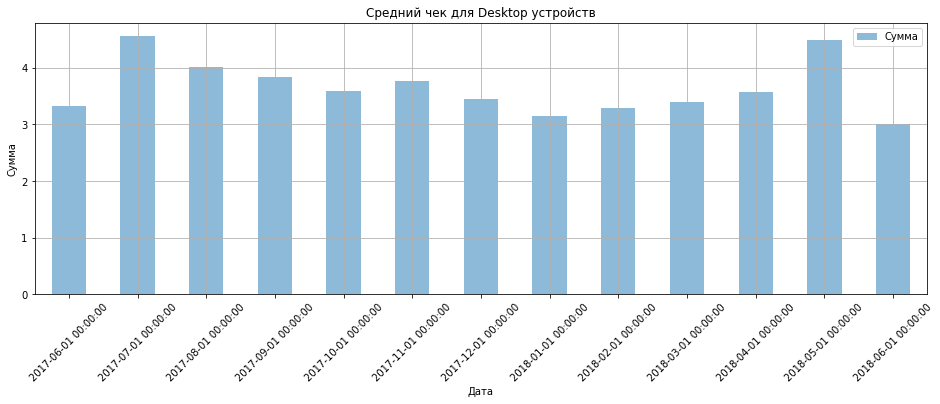

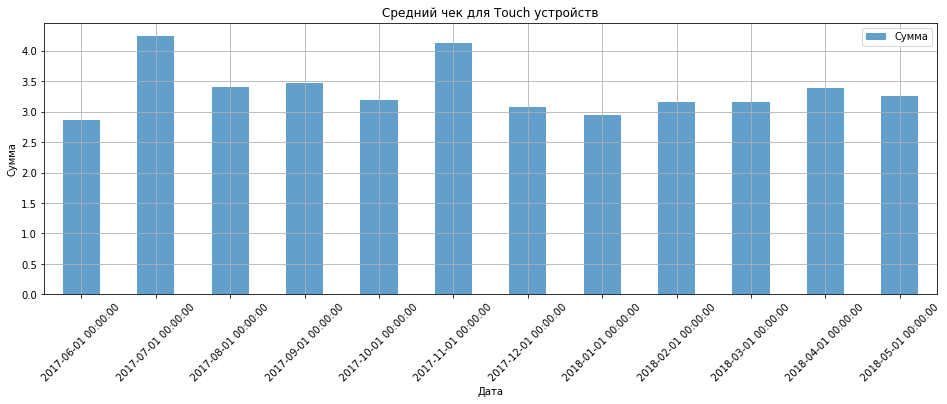

In [54]:
mean_check_desktop.plot(x='order_month', y='mean_revenue', kind='bar', figsize=(16, 5), grid=True, alpha=0.5, label='Сумма')
plt.xticks(rotation= 45)
plt.title('Средний чек для Desktop устройств')
plt.ylabel('Сумма')
plt.xlabel('Дата')

mean_check_touch.plot(x='order_month', y='mean_revenue', kind='bar', figsize=(16, 5), grid=True, alpha=0.7, label='Сумма')
plt.xticks(rotation= 45)
plt.title('Средний чек для Touch устройств')
plt.ylabel('Сумма')
plt.xlabel('Дата')
plt.show()

In [55]:
print('Среднее "средний чек" по desktop юзерам:', mean_check_desktop['mean_revenue'].mean())

print('Среднее "средний чек" по touch юзерам:', mean_check_touch['mean_revenue'].mean())

Среднее "средний чек" по desktop юзерам: 3.6459272186997214
Среднее "средний чек" по touch юзерам: 3.35800997776634


#### Сколько денег приносят? (LTV)

In [56]:
#нахожу месяц покупки на каждого пользователя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [57]:
#нахожу число новых покупателей в каждый месяц
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.drop_duplicates()

#строю когорты. Добавляю месяц первой покупки каждого покупателя в таблицу:
orders.drop(['first_order_month'], axis='columns', inplace=True)
orders_new = pd.merge(orders,first_orders, on='uid')

In [58]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [59]:
#соберу нужные данные в новый фрейм: 
finance = pd.merge(cohort_sizes, cohorts, on='first_order_month')

margin_rate = 1 #посчитаю за 100%
finance['gp'] = finance['revenue'] * margin_rate 

In [60]:
#считаю возраст когорт
finance['age'] = (finance['order_month'] - finance['first_order_month']) / np.timedelta64(1, 'M')
finance['age'] = finance['age'].round().astype('int')

In [61]:
#считаю LTV
finance['ltv'] = finance['gp'] / finance['n_buyers']

In [62]:
table = finance.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').rename_axis(None, axis=1)

table.index = table.index.strftime("%m/%Y")
table = table.cumsum(axis = 1)

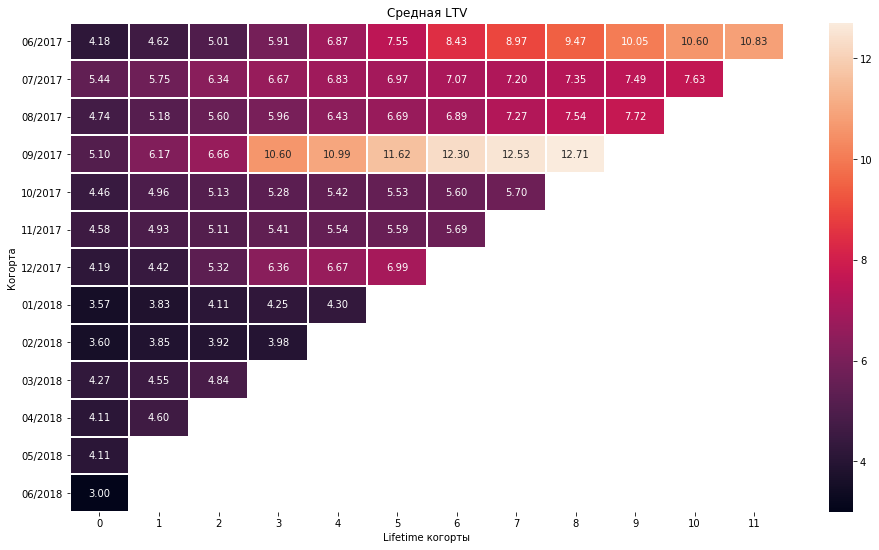

In [63]:
plt.figure(figsize=(16, 9))
plt.title('Средная LTV')
sns.heatmap(table, annot=True, fmt='.2f', linewidths=1)
plt.ylabel('Когорта')
plt.xlabel('Lifetime когорты')
plt.show()

In [64]:
table[5].mean()

7.27660398073939

In [65]:
sources = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'})

payers = orders.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})

ltv = payers.merge(orders, on = 'uid')
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)
orders_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'count').fillna(0)
buyers_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'uid', aggfunc = 'nunique').fillna(0)
ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv = ltv.cumsum(axis = 1)

cohort_sizes = payers.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
ltv = ltv.merge(cohort_sizes, on = 'source_id')
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')
display(ltv)

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,5.550270,6.491903,7.172065,7.725034,8.110661,8.280027,8.485830,8.771930,9.039811,9.233806,9.315452,9.423752,9.471997
2,6.208250,7.405690,9.025605,10.520910,11.134282,11.697582,11.920626,12.136273,12.344523,12.408819,12.516358,12.545946,12.548506
3,3.916862,4.145882,4.267174,4.392760,4.459797,4.495511,4.515515,4.536105,4.549473,4.553962,4.558548,4.559426,4.559719
4,4.013745,4.152180,4.256205,4.342727,4.459211,4.614753,4.727084,4.773658,4.789973,4.826857,4.881539,4.883912,4.885000
5,4.387469,4.563751,4.894406,6.287425,6.548415,6.722506,6.846648,6.944355,7.020155,7.093910,7.105886,7.115671,7.116255
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,3.300828,3.556578,3.765409,4.001840,4.084637,4.215271,4.325667,4.385465,4.494940,4.531739,4.538178,4.538178,4.538178
10,2.694487,2.794028,2.865237,2.901991,2.914242,2.916539,2.926493,2.934150,2.935681,2.937213,2.937213,2.937213,2.937213


### Вывод по продажам

70% первых заказов совершаются в первые дни пользования сервисом. При этом среднее по этому показателю -- 15 дней. Это говорит о достаточном числе пользователей, которые сделали первый заказ спустя очень большое число дней после регистрации. 

Только самая "старая" когорта может похвастаться тем, что в среднем пользователи совершают по 3-4 заказа в месяц. Остальные коллеблятся между 1-2 заказами. 

Desktop юзеры выгоднее для сервиса -- они приносят в среднем 3,65 рубля за заказ, в то время как touch юзеры -- 3,23 рубля. Динамика "среднего чека" по платформам примерно одинаковая: самыми дорогими вышли июль и ноябрь 2017-го. 

Пожизненная стоимость (LTV) пользователя Яндекс.Афиши выше всех у когорт июня и сентября 2017-го. В пике они достигают 10,83 и 12,71 рублей соответственно. 
Несмотря на срок пользования сервисом, самая неприбыльная когорта -- февраль 2018-го. 

### Маркетинг

#### Сколько денег потратили? Всего / на каждый источник / по времени

In [66]:
#всего на маркетинг потратили
print('Всего потратили на маркетинг:', costs['costs'].sum())
print('Всего заработали:', orders['revenue'].sum())
print('Прибыль за период:', (orders['revenue'].sum() - costs['costs'].sum()))

Всего потратили на маркетинг: 329131.62
Всего заработали: 227459
Прибыль за период: -101672.62


In [67]:
source_costs = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
source_costs = source_costs.sort_values('costs', ascending=False)

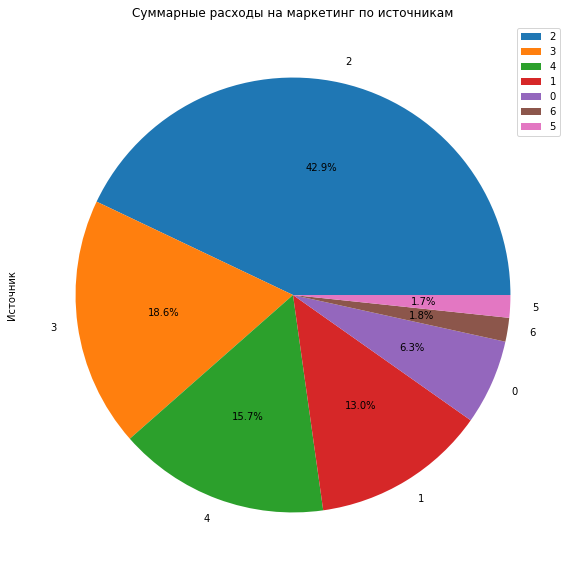

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


In [68]:
source_costs.plot(y="costs", x="source_id", kind="pie", figsize=(10, 10), autopct='%1.1f%%', label='Источник')
plt.title('Суммарные расходы на маркетинг по источникам')
plt.show()
display(source_costs)

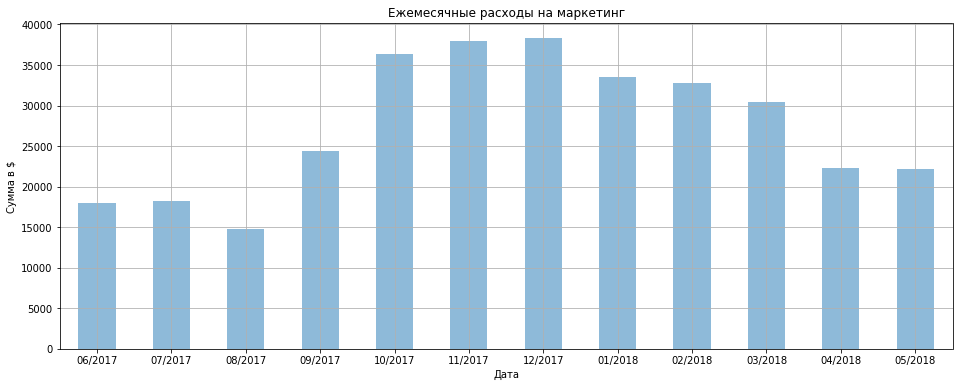

In [69]:
costs['dt'] = costs['dt'].astype('datetime64[M]')
costs_month = costs.groupby('dt').agg({'costs':'sum'})
costs_month.index = costs_month.index.strftime("%m/%Y")
costs_month.plot(kind='bar', figsize=(16, 6), title='Ежемесячные расходы на маркетинг', grid=True, legend=False, y='costs', alpha=0.5)
plt.xticks(rotation = 0)
plt.xlabel('Дата')
plt.ylabel('Сумма в $')
plt.show()

In [70]:
costs_month.mean()

costs    27427.635
dtype: float64

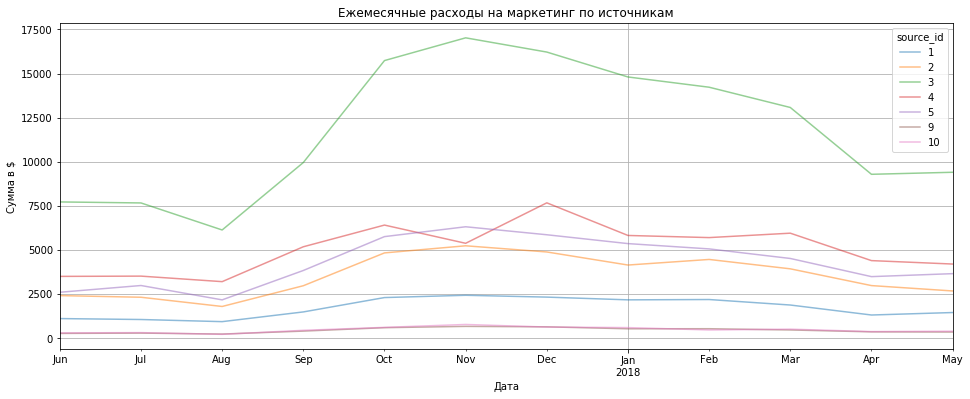

In [71]:
costs_month_by_source = costs
costs_month_by_source = costs_month_by_source.pivot_table(index='dt', columns='source_id', values='costs', aggfunc='sum')
costs_month_by_source.plot(figsize=(16, 6), title='Ежемесячные расходы на маркетинг по источникам',  grid=True, legend=True, alpha=0.5)
plt.xlabel('Дата')
plt.ylabel('Сумма в $')
plt.show()

### Сколько стоило привлечение одного покупателя из каждого источника?

In [72]:
first_source = visits.sort_values('start_ts').groupby('uid').agg({'source_id':'first'}).reset_index() 

orders_new = first_source.merge(first_orders, on='uid')

In [73]:
#Считаю клиентов для каждой кагорты:
cohort_sizes = orders_new.groupby(['source_id', 'first_order_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['source_id', 'month', 'users']

In [74]:
source_costs = costs.groupby(['source_id', 'dt']).agg({'costs':'sum'}).reset_index()

In [75]:
source_fin = cohort_sizes.merge(source_costs)
source_fin['cac'] = source_fin['costs'] / source_fin['users']
print('Средний CAC равен:', source_fin['cac'].mean())

Средний CAC равен: 68.98637615813213


In [76]:
cohort_sizes = payers.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
cac = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index().merge(cohort_sizes.reset_index(), left_on = 'source_id', right_on='source_id')
cac['cac'] = cac['costs'] / cac['cohort_size']
cac = cac.set_index('source_id')
display(cac)

,costs,cohort_size,cac
source_id,,,
1,20833.27,2964,7.028769
2,42806.04,3515,12.178105
3,141321.63,10248,13.790167
4,61073.60,10113,6.039118
5,51757.10,6847,7.559092
9,5517.49,1087,5.075888
10,5822.49,1306,4.458262


### На сколько окупились расходы? (ROI)

In [77]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'users']
orders_new = pd.merge(orders,first_orders, on='uid')
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [78]:
finance = pd.merge(cohort_sizes, cohorts, on='first_order_month')

finance['gp'] = finance['revenue'] * margin_rate 
finance['age'] = (finance['order_month'] - finance['first_order_month']) / np.timedelta64(1, 'M')
finance['age'] = finance['age'].round().astype('int')
finance['ltv'] = finance['gp'] / finance['users']

costs.rename(columns={'dt': 'order_month'}, inplace=True)

monthly_costs = costs.groupby('order_month').sum()
finance_new = pd.merge(finance, monthly_costs, left_on='first_order_month', right_on='order_month')

In [79]:
finance_new['cac'] = finance_new['costs'] / finance_new['users'] 
finance_new['romi'] = finance_new['ltv'] / finance_new['cac'] 

In [80]:
output = finance_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output = output.cumsum(axis=1).round(2)
output.index = output.index.strftime("%m/%Y")

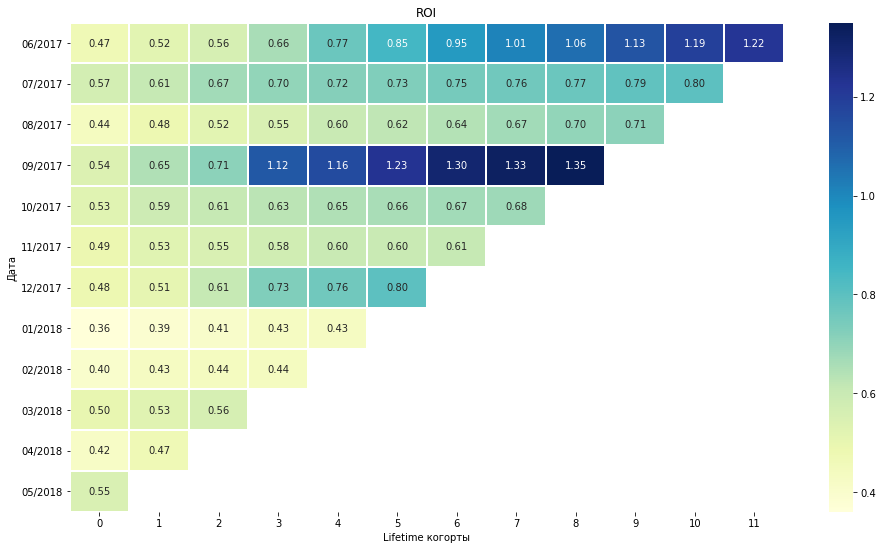

In [81]:
plt.figure(figsize=(16, 9))
plt.title('ROI')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap="YlGnBu")
plt.yticks(rotation= 0)
plt.ylabel('Дата')
plt.xlabel('Lifetime когорты')
plt.show()

In [82]:
output[11].mean()

1.22

In [83]:
romi = ltv.merge(cac[['cac']], on = 'source_id')
romi = romi.div(romi['cac'], axis = 0).drop(columns = 'cac')

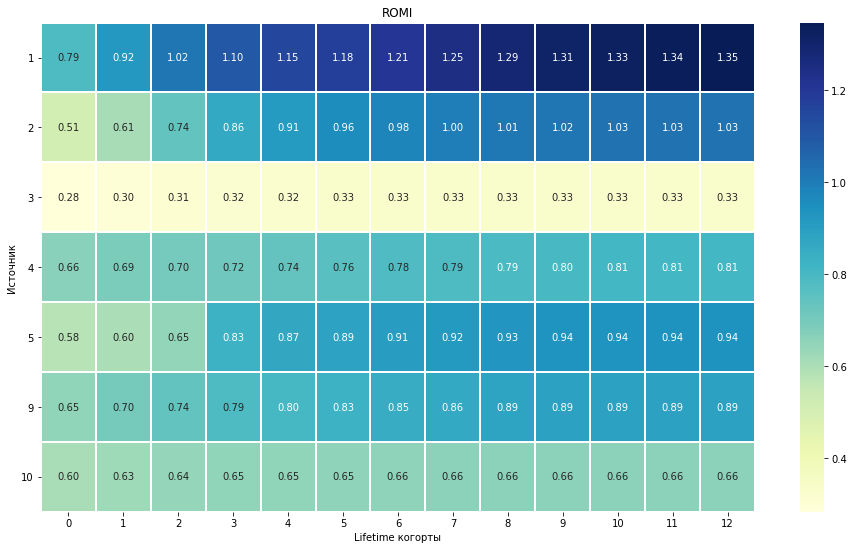

In [84]:
plt.figure(figsize=(16, 9))
plt.title('ROMI')
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap="YlGnBu")
plt.yticks(rotation= 0)
plt.ylabel('Источник')
plt.xlabel('Lifetime когорты')
plt.show()

<div class="alert alert-block alert-info">Готово! Выходит, что быстрее всего окупается первый и второй источник</div>

#### Вывод по маркетингу 

В целом, можно говорить о неэффективности маркетинговой компании. За год убыток составил около 100 тысяч рублей. Самые высокие расходы были в зимний период: с октября по март. При этом динамика трат практически одинаковая по всем источникам трафика. 
Самыми затратными оказались 2,3,4 и 1 источники. 

Привлечение одного пользователя в среднем обходится в 68 рублей, а затраты на маркетинг приближаются к окупаемости только к 11-12 месяцу жизни когорт. Только в единственном случае ROI превысил одиницу в первые полгода жизни когорты сентября 2017. 

# Шаг 3. Общий вывод

***Продукт***

**DAU**
- touch: 252
- desktop: 659

**WAU**
- touch: 1613
- desktop: 4090

**MAU**
- touch: 6825
- desktop: 16724

**Сессий в день** 
Что touch, что desktop совершают в среднем одну сессию в день.

**Длинна сессии**
- touch: 3 минуты
- desktop: 6 минут
- в целом: 5 минут

**Retention Rate**
у каждой когорты пользователей снижается от месяца к месяцу. В среднем на 6й месяц жизни когорты равен 3,75% 

***Продажи***

Среднее число дней после регистрации до первой покупки: 0 - большая часть пользователей покупает сразу

Доля покупок в день регистрации: 70,74%

В среднем по когортам пользователи совершают **от 1 до 2 заказов в месяц**. 

Средний "средний чек" по desktop юзерам: 3.65 
Средний "средний чек" по touch юзерам: 3.36 

**Средняя Lifetime Value** у когорт на 6 месяце жизни состаляет 7,28

***Маркетинг***

**Всего потратили** на маркетинг: 327877

**Всего заработали**: 227459

**Прибыль за период**: -100418

В среднем за месяц тратили на маркетинг: 27323

Больше всего вкладывались в рекламные источники: 2 (43%), 3 (18,6%), 4 (15,7%), 1 (13,0%).

Эжемесячные расходы с июня 2017 по май 2018 изображают синусоиду. **Самые затратные были месяца с октября по март**. 
Динамика затрат по источникам одинаковая. 

**Стоимость привлечения одного клиента** равна: 68.74. При этом самыми дорогими источниками привлечения являются 3 и 4, а самыми дешевыми -- 9 и 10.

**Затраты на инвестиции начинают окупаться спустя примерно год** с момента жизни когорты. Средний ROI на 6м месяце жизни когорты равен 78,71%. 
По источникам самым быстрее всего окупается первый и второй -- они начинают "выходить в плюс уже на третий и шестой месяцы соответственно.

**Выводы:**

1) В мобильной версии пользователи проводят в среднем почти 3 минут за сессию, в то время как для десктоп версии этот показатель равен 6 минутам.

2) Retention Rate падает из месяца в месяц. 

3) Desktop юзеры выгоднее для сервиса -- они приносят в среднем 3,65 рубля за заказ, в то время как touch юзеры -- 3,23 рубля. 

4) Маркетинговая компания убыточна

5) Самые дорогие для привлечения источники -- 3 и 4, генерируют наибольшее число заказов. 

**Рекомендации:** 

1) Сосредоточиться на улучшении Touch версии: на данный момент в ней меньше проводят времени, у нее меньше пользователей и меньше "средний чек". 

2) Провести более детальный анализ источников трафика: возможно, стоит сократить вливания в доминирующие сейчас по затратам источники, сделав ставку на альтернативные. Так, возможно, поличится снизить CAC.  

3) Подумать над программой лояльности, заставить пользователей возвращаться в сервис, чтобы увеличить Retention Rate.

4) Для увеличения числа заказов одним пользователем в месяц разработать систему сгоряющих бонусов, которые можно применить только в ограниченное время. Тем самым стимулировать клиентов покупать билеты чаще. 